### loading and feature engineering


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
follows_df = pd.read_csv("follows.csv")
likes_df = pd.read_csv("likes.csv")
photo_tags_df = pd.read_csv("photo_tags.csv")
photos_df = pd.read_csv("photos.csv")
tags_df = pd.read_csv("tags.csv")
users_df = pd.read_csv("users.csv")

# Convert date fields
follows_df['created time'] = pd.to_datetime(follows_df['created time'], errors='coerce')
likes_df['created time'] = pd.to_datetime(likes_df['created time'], errors='coerce')
photos_df['created dat'] = pd.to_datetime(photos_df['created dat'], errors='coerce')
tags_df['created time'] = pd.to_datetime(tags_df['created time'], errors='coerce')
users_df['created time'] = pd.to_datetime(users_df['created time'], errors='coerce')

# Rename columns for consistency
follows_df.columns = follows_df.columns.str.strip().str.lower().str.replace(' ', '_')
likes_df.columns = likes_df.columns.str.strip().str.lower().str.replace(' ', '_')
photo_tags_df.columns = photo_tags_df.columns.str.strip().str.lower().str.replace(' ', '_')
photos_df.columns = photos_df.columns.str.strip().str.lower().str.replace(' ', '_')
tags_df.columns = tags_df.columns.str.strip().str.lower().str.replace(' ', '_')
users_df.columns = users_df.columns.str.strip().str.lower().str.replace(' ', '_')


/tmp/ipython-input-2-2820987832.py:12: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  follows_df['created time'] = pd.to_datetime(follows_df['created time'], errors='coerce')
/tmp/ipython-input-2-2820987832.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  likes_df['created time'] = pd.to_datetime(likes_df['created time'], errors='coerce')
/tmp/ipython-input-2-2820987832.py:14: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  photos_df['created dat'] = pd.to_datetime(photos_df['created dat'], errors='coerce')
/tmp/ipython-input-2-2820987832.py:15: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the d

### User Profile Insights


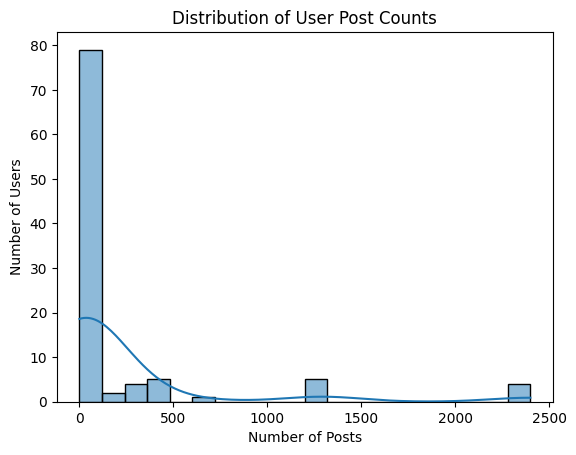

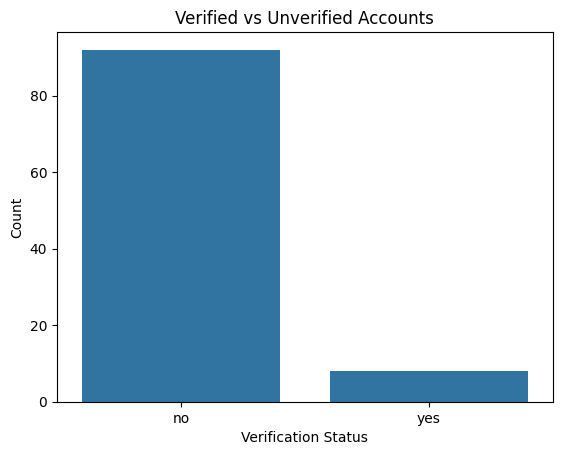

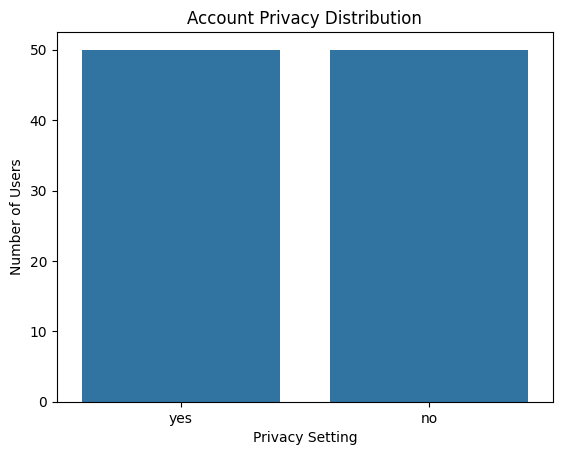

In [3]:
# Distribution of post counts
plt.figure()
sns.histplot(users_df['post_count'], bins=20, kde=True)
plt.title('Distribution of User Post Counts')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.show()

# Verified vs Unverified
plt.figure()
sns.countplot(x='verified_status', data=users_df)
plt.title('Verified vs Unverified Accounts')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

# Private vs Public
plt.figure()
sns.countplot(x='private/public', data=users_df)
plt.title('Account Privacy Distribution')
plt.xlabel('Privacy Setting')
plt.ylabel('Number of Users')
plt.show()


### Follow Network Analysis


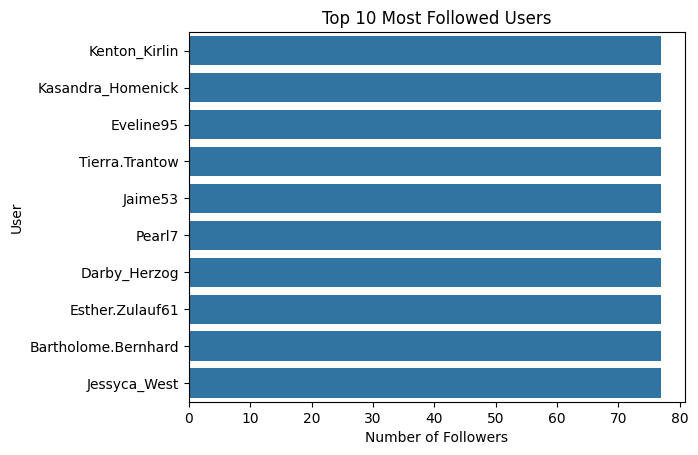

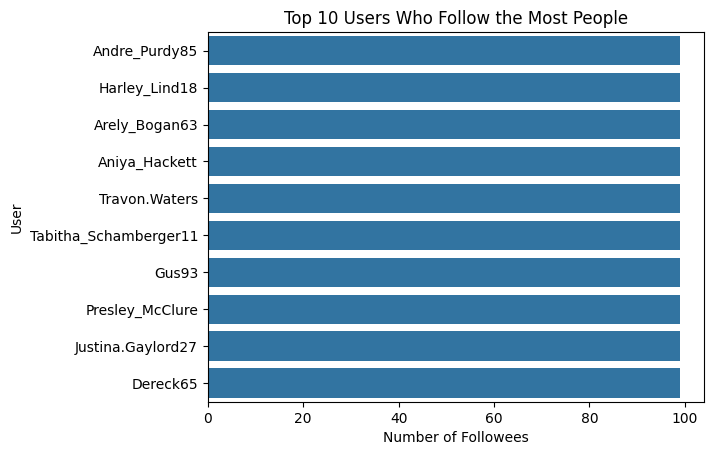

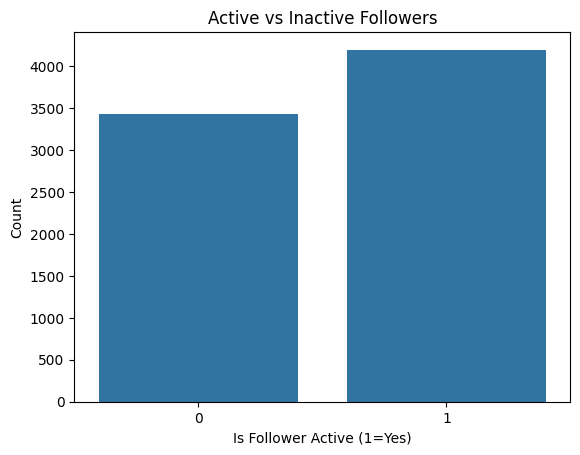

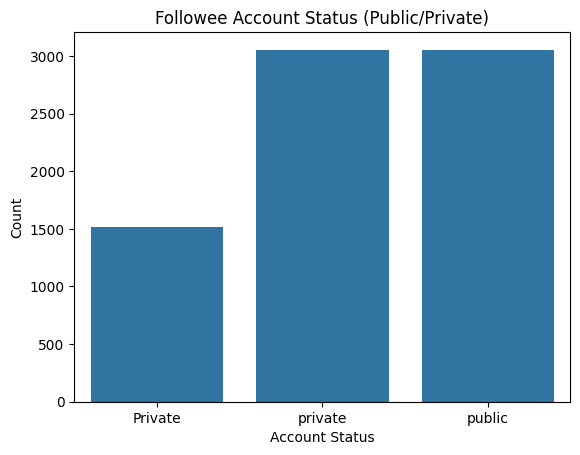

In [4]:
# Top 10 most followed users
top_followed = follows_df['followee'].value_counts().head(10)
top_followed_users = users_df[users_df['id'].isin(top_followed.index)]

plt.figure()
sns.barplot(x=top_followed.values, y=top_followed_users['name'])
plt.title('Top 10 Most Followed Users')
plt.xlabel('Number of Followers')
plt.ylabel('User')
plt.show()

# Top 10 users who follow the most people
top_followers = follows_df['follower'].value_counts().head(10)
top_follower_users = users_df[users_df['id'].isin(top_followers.index)]

plt.figure()
sns.barplot(x=top_followers.values, y=top_follower_users['name'])
plt.title('Top 10 Users Who Follow the Most People')
plt.xlabel('Number of Followees')
plt.ylabel('User')
plt.show()

# Distribution of active followers
plt.figure()
sns.countplot(x='is_follower_active', data=follows_df)
plt.title('Active vs Inactive Followers')
plt.xlabel('Is Follower Active (1=Yes)')
plt.ylabel('Count')
plt.show()

# Public vs Private Followee Status
plt.figure()
sns.countplot(x='followee_acc_status', data=follows_df)
plt.title('Followee Account Status (Public/Private)')
plt.xlabel('Account Status')
plt.ylabel('Count')
plt.show()


### Engagement Analysis

In [6]:
# Merge likes with users and photos
likes_merged = likes_df.merge(users_df, left_on='user', right_on='id', suffixes=('', '_user'))
likes_merged = likes_merged.merge(photos_df, left_on='photo', right_on='id', suffixes=('', '_photo'))


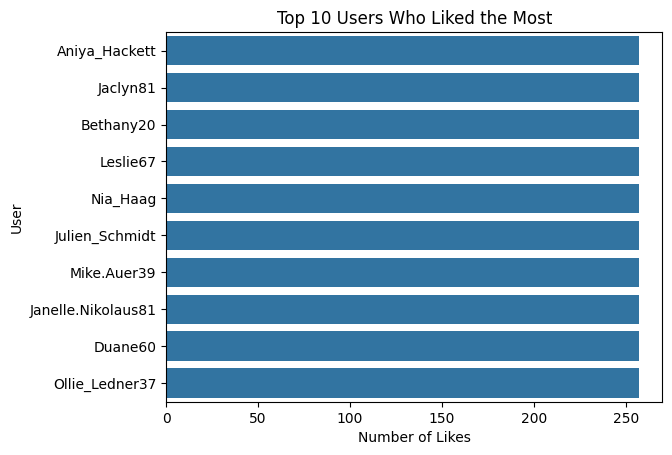

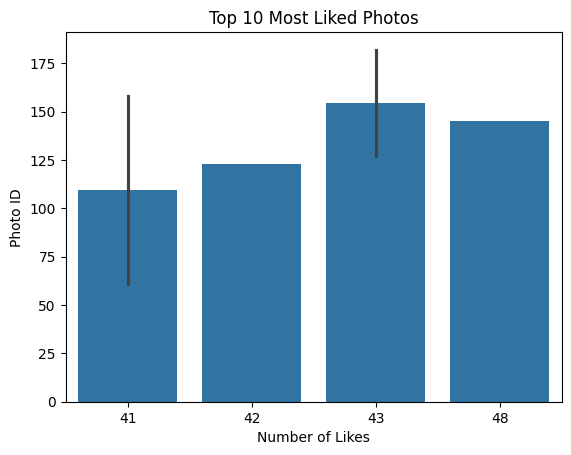

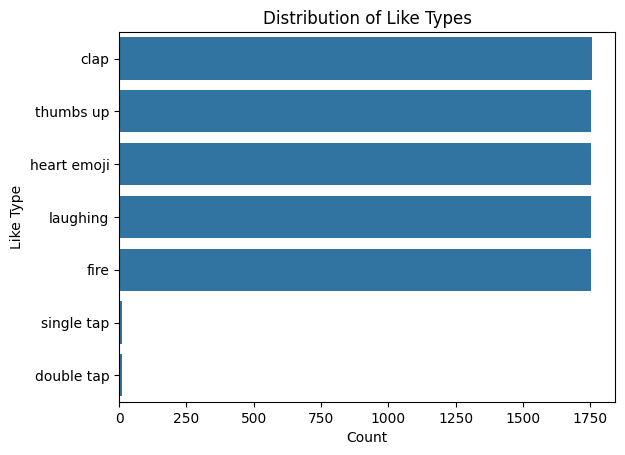

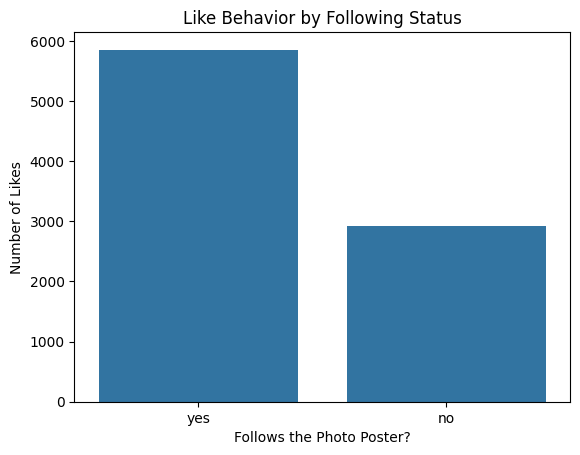

In [7]:
# Top 10 users who liked the most
top_likers = likes_merged['name'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_likers.values, y=top_likers.index)
plt.title('Top 10 Users Who Liked the Most')
plt.xlabel('Number of Likes')
plt.ylabel('User')
plt.show()

# Top 10 most liked photos
most_liked_photos = likes_df['photo'].value_counts().head(10)
plt.figure()
sns.barplot(x=most_liked_photos.values, y=most_liked_photos.index)
plt.title('Top 10 Most Liked Photos')
plt.xlabel('Number of Likes')
plt.ylabel('Photo ID')
plt.show()

# Distribution of Like Types
plt.figure()
sns.countplot(data=likes_df, y='like_type', order=likes_df['like_type'].value_counts().index)
plt.title('Distribution of Like Types')
plt.xlabel('Count')
plt.ylabel('Like Type')
plt.show()

# Does following impact liking behavior?
plt.figure()
sns.countplot(data=likes_df, x='following_or_not')
plt.title('Like Behavior by Following Status')
plt.xlabel('Follows the Photo Poster?')
plt.ylabel('Number of Likes')
plt.show()


### Photo Analysis (Filters, Types)


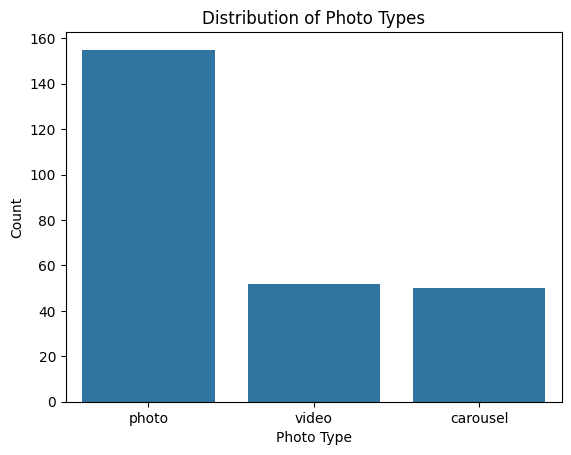

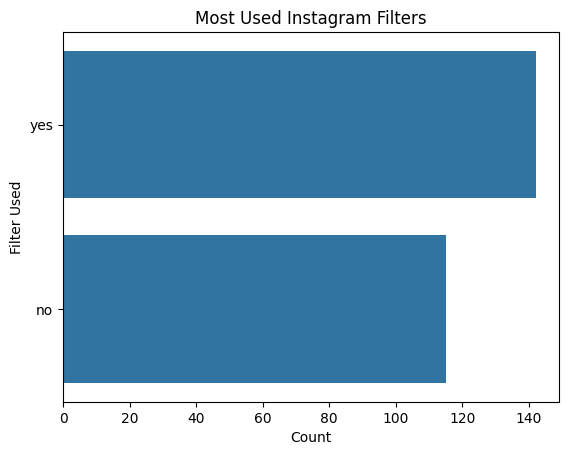

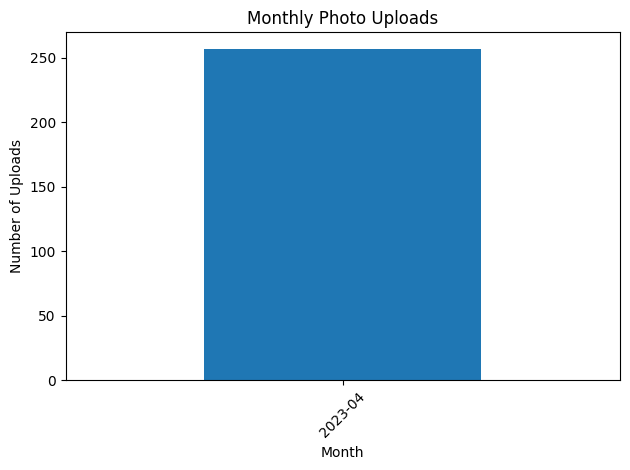

In [8]:
# Photo Type Distribution
plt.figure()
sns.countplot(data=photos_df, x='photo_type')
plt.title('Distribution of Photo Types')
plt.xlabel('Photo Type')
plt.ylabel('Count')
plt.show()

# Filter Usage Analysis
plt.figure()
sns.countplot(data=photos_df, y='insta_filter_used', order=photos_df['insta_filter_used'].value_counts().index)
plt.title('Most Used Instagram Filters')
plt.xlabel('Count')
plt.ylabel('Filter Used')
plt.show()

# Photo uploads over time
photos_df['upload_month'] = photos_df['created_dat'].dt.to_period('M')
monthly_uploads = photos_df.groupby('upload_month').size()

plt.figure()
monthly_uploads.plot(kind='bar')
plt.title('Monthly Photo Uploads')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Tag and Popularity Analysis

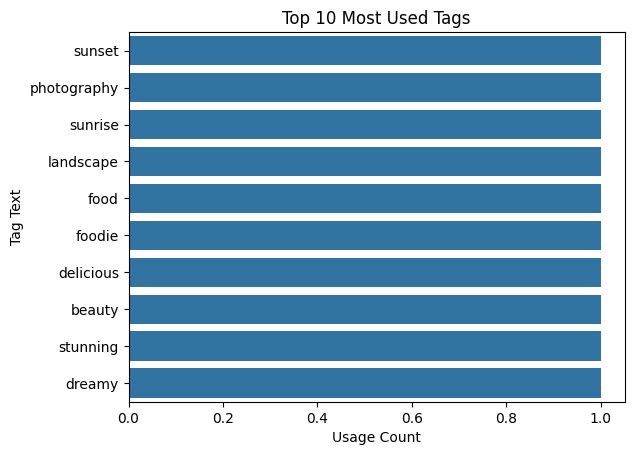

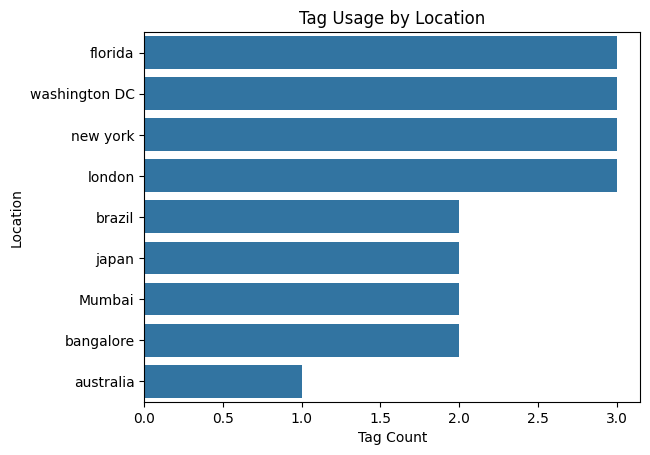

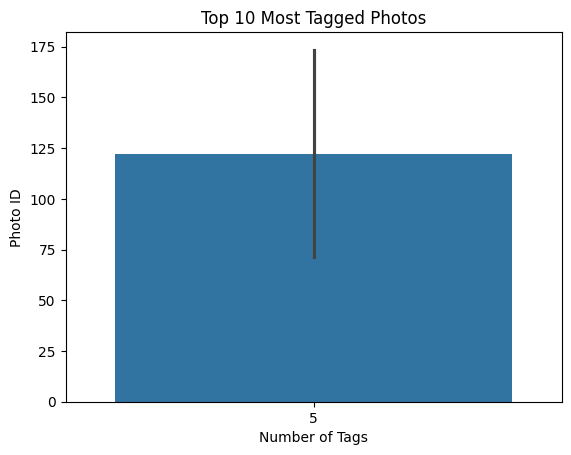

In [9]:
# Top 10 most used tags
top_tags = tags_df['tag_text'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 10 Most Used Tags')
plt.xlabel('Usage Count')
plt.ylabel('Tag Text')
plt.show()

# Tag usage by location
plt.figure()
sns.countplot(data=tags_df, y='location', order=tags_df['location'].value_counts().index)
plt.title('Tag Usage by Location')
plt.xlabel('Tag Count')
plt.ylabel('Location')
plt.show()

# Merge tag info with photos through photo_tags
photo_tags_merged = photo_tags_df.merge(tags_df, left_on='tag_id', right_on='id', suffixes=('', '_tag'))
photo_tags_merged = photo_tags_merged.merge(photos_df, left_on='photo', right_on='id', suffixes=('', '_photo'))

# Most tagged photos
most_tagged_photos = photo_tags_df['photo'].value_counts().head(10)
plt.figure()
sns.barplot(x=most_tagged_photos.values, y=most_tagged_photos.index)
plt.title('Top 10 Most Tagged Photos')
plt.xlabel('Number of Tags')
plt.ylabel('Photo ID')
plt.show()


### User Activity Over Time

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


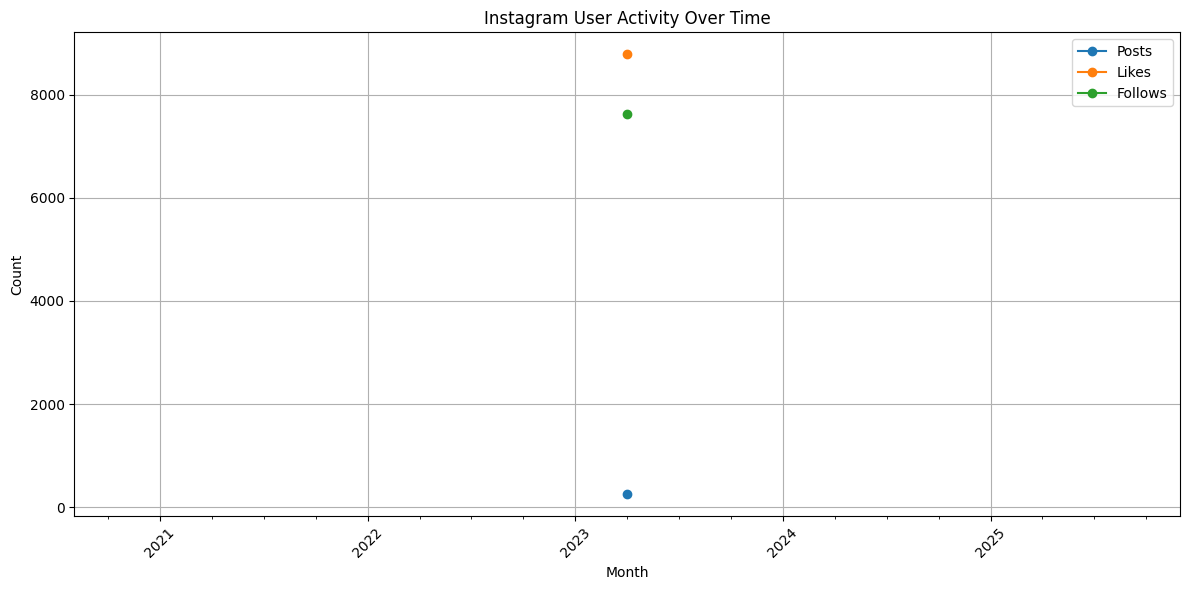

In [10]:
# Extract months for each activity
users_df['month_joined'] = users_df['created_time'].dt.to_period('M')
photos_df['post_month'] = photos_df['created_dat'].dt.to_period('M')
likes_df['like_month'] = likes_df['created_time'].dt.to_period('M')
follows_df['follow_month'] = follows_df['created_time'].dt.to_period('M')

# Count per month
monthly_posts = photos_df.groupby('post_month').size()
monthly_likes = likes_df.groupby('like_month').size()
monthly_follows = follows_df.groupby('follow_month').size()

# Combine into one DataFrame
activity_df = pd.DataFrame({
    'Posts': monthly_posts,
    'Likes': monthly_likes,
    'Follows': monthly_follows
}).fillna(0)

# Plot
activity_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Instagram User Activity Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Mutual Followers & Influencer Detection

In [11]:
# Count how many followers each user has
followers_count = follows_df['followee'].value_counts()

# Count how many accounts each user follows
following_count = follows_df['follower'].value_counts()

# Combine both into one DataFrame
influencer_df = pd.DataFrame({
    'user_id': followers_count.index,
    'followers': followers_count.values,
    'following': following_count.reindex(followers_count.index).fillna(0).astype(int)
})

# Calculate Follower/Following Ratio
influencer_df['follower_following_ratio'] = influencer_df['followers'] / influencer_df['following'].replace(0, 1)

# Merge with user names
influencer_df = influencer_df.merge(users_df[['id', 'name']], left_on='user_id', right_on='id', how='left')

# Sort and get top 10 influencers
top_influencers = influencer_df.sort_values(by='follower_following_ratio', ascending=False).head(10)

# Display
print(top_influencers[['name', 'followers', 'following', 'follower_following_ratio']])


                  name  followers  following  follower_following_ratio
0        Kenton_Kirlin         77          0                      77.0
1       Tierra.Trantow         77          0                      77.0
2              Jaime53         77          0                      77.0
3    Kasandra_Homenick         77          0                      77.0
4               Pearl7         77          0                      77.0
5            Eveline95         77          0                      77.0
6         Darby_Herzog         77          0                      77.0
7      Esther.Zulauf61         77          0                      77.0
8  Bartholome.Bernhard         77          0                      77.0
9         Jessyca_West         77          0                      77.0


### Top Filters vs Likes

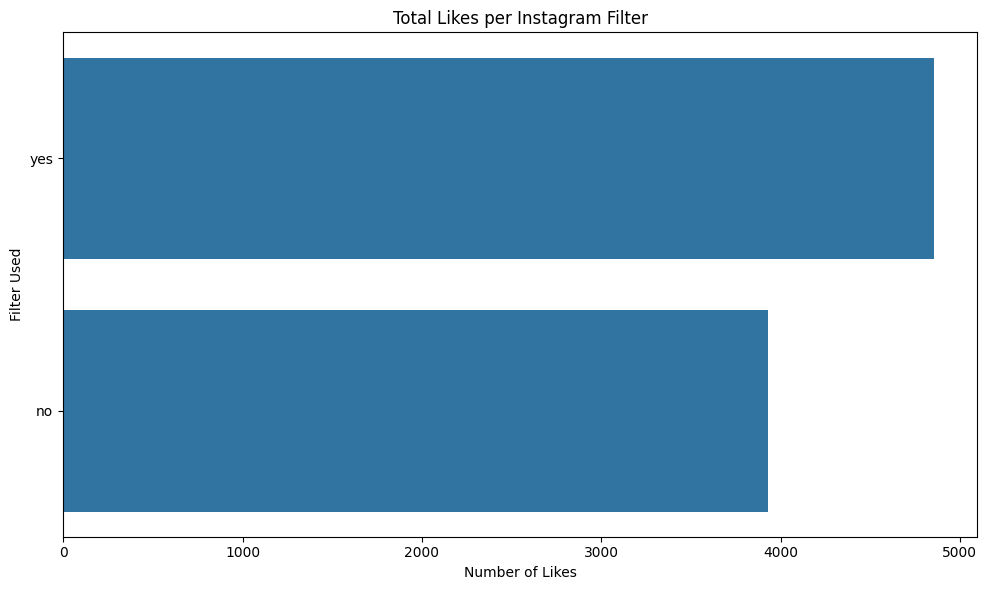

In [13]:
# Step 1: Merge photo info into likes to associate each like with a filter
likes_with_filters = likes_df.merge(photos_df[['id', 'insta_filter_used']], left_on='photo', right_on='id')

# Step 2: Count total likes per filter
likes_per_filter = likes_with_filters['insta_filter_used'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=likes_per_filter.values, y=likes_per_filter.index)
plt.title('Total Likes per Instagram Filter')
plt.xlabel('Number of Likes')
plt.ylabel('Filter Used')
plt.tight_layout()
plt.show()


### average likes per photo for each filter

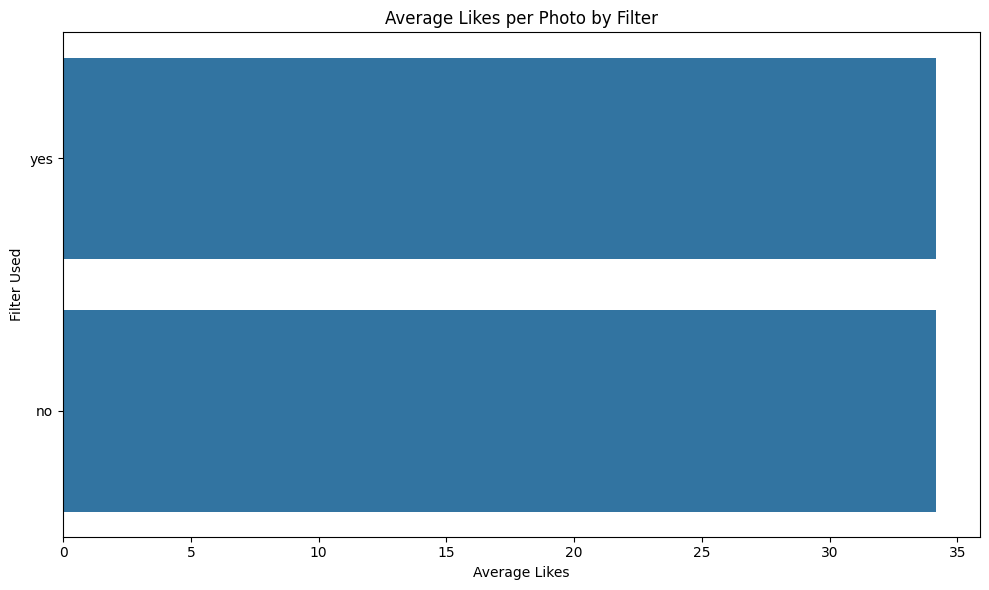

In [14]:
# Count likes per photo
likes_count_per_photo = likes_df['photo'].value_counts().rename('like_count')

# Merge into photo info
photo_with_likes = photos_df.merge(likes_count_per_photo, left_on='id', right_index=True, how='left').fillna(0)

# Group by filter and get average likes per photo
avg_likes_per_filter = photo_with_likes.groupby('insta_filter_used')['like_count'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_likes_per_filter.values, y=avg_likes_per_filter.index)
plt.title('Average Likes per Photo by Filter')
plt.xlabel('Average Likes')
plt.ylabel('Filter Used')
plt.tight_layout()
plt.show()


### Tag Location Heatmap

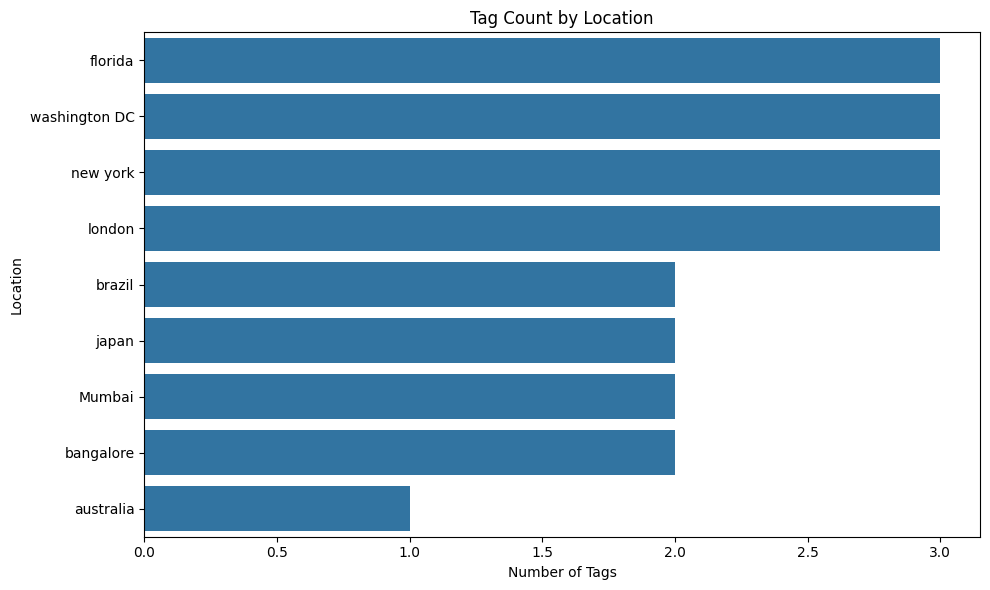

In [16]:
# Count tags per location
tag_location_counts = tags_df['location'].value_counts()

# Barplot of most tagged locations
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_location_counts.values, y=tag_location_counts.index)
plt.title('Tag Count by Location')
plt.xlabel('Number of Tags')
plt.ylabel('Location')
plt.tight_layout()
plt.show()
